http://machinelearninguru.com/deep_learning/data_preparation/hdf5/hdf5.html

In [11]:
from cnn_utils import load_dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from random import randint

from keras.models import load_model
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.callbacks import TensorBoard
# import pydot
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K

K.set_image_data_format('channels_last')

%matplotlib inline

### Load dataset

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset('train_wenig.hdf5', 'test_wenig.hdf5')

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
#print ("classes: " + str(classes))

number of training examples = 1146
number of test examples = 128
X_train shape: (1146, 112, 112, 3)
Y_train shape: (1146, 1)
X_test shape: (128, 112, 112, 3)
Y_test shape: (128, 1)


In [8]:
# Example of a picture
index = randint(1, X_train.shape[0])
plt.imshow(cv2.cvtColor(X_train[index], cv2.COLOR_BGR2RGB))
print ("y = " + str(np.squeeze(Y_test[:, index])))

error: ..\..\..\modules\imgproc\src\color.cpp:7935: error: (-215) depth == CV_8U || depth == CV_16U || depth == CV_32F in function cv::cvtColor


### create Keras model

In [ ]:
def test_wineModel(input_shape):
    """
    Implementation of the wineModel.
    
    Arguments:
        input_shape -- shape of the images of the dataset

    Returns:
        model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
#     X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(20, (11, 11), strides = (4, 4), name = 'conv1')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)    
    X = Activation('relu')(X)
    # Dropout Layer
#     X = Dropout(0.2)(X)
    
    # MaxPool
    X = MaxPooling2D((3, 3), strides=(2,2), name='max_pool1')(X)    
    
    # second layer
    X = Conv2D(50, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
#     X = Dropout(0.2)(X)
    
    # MaxPool
    X = MaxPooling2D((3, 3), strides=(2,2), name='max_pool2')(X) 
    
    # third layer
#     X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2')(X)
#     X = BatchNormalization(axis = 3, name = 'bn2')(X)
#     X = Activation('relu')(X)
#     X = Dropout(0.2)(X)
    
    # MAXPOOL
#     X = MaxPooling2D((2, 2), name='max_pool2')(X)

    # FLATTEN X
    X = Flatten()(X)
    
    # Fully Connected layer
    X = Dense(2048, activation='relu', name='fc1')(X)
    
    # Fully Connected layer    
    X = Dense(2048, activation='relu', name='fc2')(X)
    
    # Fully connected output layer
    X = Dense(1, activation='sigmoid', name='fc3')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='WineModel')
    
    return model

In [18]:
def wineModel(input_shape):
    """
    Implementation of the wineModel.
    
    Arguments:
        input_shape -- shape of the images of the dataset

    Returns:
        model -- a Model() instance in Keras
    """  
    X_input = Input(input_shape)

    X = Conv2D(20, (11, 11), strides = (4, 4), name = 'conv1')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)    
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
        
    X = MaxPooling2D((3, 3), strides=(2,2), name='max_pool1')(X)    

    X = Conv2D(50, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    
    X = MaxPooling2D((3, 3), strides=(2,2), name='max_pool2')(X) 

    X = Flatten()(X)

    X = Dense(1028, activation='relu', name='fc1')(X)

    X = Dense(1, activation='sigmoid', name='fc2')(X)

    model = Model(inputs = X_input, outputs = X, name='WineModel')  
    return model

In [23]:
# input_shape must be same as pixel (300x150) 
model = wineModel(input_shape = (300,150,3,))

### compile the model

In [24]:
# defaults for SGD: (lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# defaults for Adam (from original paper): (lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 
# metrics: mse, accuracy,...
# loss: categorical_crossentropy, binary_crossentropy
# sgd = SGD(lr=0.0001, momentum=0.2, decay=0.0, nesterov=False)
adam = Adam(lr=0.001)
model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

### Set up Tensorboard callbacks

In [25]:
tensor_logger = TensorBoard(
    log_dir='./logs', 
    histogram_freq=0, 
    batch_size=32, 
    write_graph=True, 
    write_grads=False, 
    write_images=False, 
    embeddings_freq=0, 
    embeddings_layer_names=None, 
    embeddings_metadata=None)

### fit the model (training process)

In [31]:
# model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)
history = model.fit(x= X_train, y = Y_train, epochs = 2, batch_size = 32, callbacks=[tensor_logger])

Epoch 1/2
7601/7601 [==============================] - 211s 28ms/step - loss: 2.1375 - acc: 0.8674
Epoch 2/2
7601/7601 [==============================] - 212s 28ms/step - loss: 2.1375 - acc: 0.8674


## Visualize Results
For quick visualization. Tensorboard is way cooler <br>
http://www.codesofinterest.com/2017/03/graph-model-training-history-keras.html  <br>
tensorboard --logdir=C:\Users\JansPC\AnacondaProjects\Weinseminar\wineModel\logs <br>
https://keras.io/callbacks/

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 150, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 73, 35, 20)        7280      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 73, 35, 20)        80        
_________________________________________________________________
activation_3 (Activation)    (None, 73, 35, 20)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 73, 35, 20)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 36, 17, 20)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 13, 50)        25050     
__________

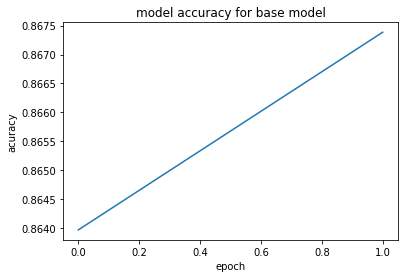

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy for base model')
plt.ylabel('acuracy')
plt.xlabel('epoch')
plt.show()
# plt.savefig('learning_process_accuracy')

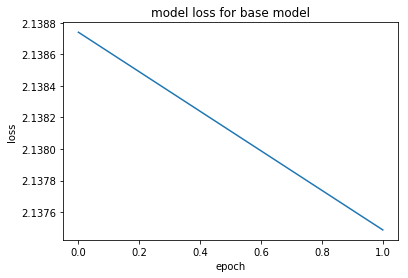

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss for base model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
# plt.savefig('learning_process_loss')

## Test the model on the testSet

In [30]:
#model.evaluate(x = ..., y = ...)
preds = model.evaluate(x = X_test, y = Y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1901/1901 [==============================] - 24s 13ms/step
Loss = 2.3062188120530442
Test Accuracy = 0.8569174119198341


In [ ]:
# creates an HDF5 file with model parameters for later use
model.save('best_wineModel_1119_255_2Layer.h5')  

### predict class of  image that the algorithm has never seen before

In [ ]:
# returns a compiled model
model = load_model('best_wineModel_1119_255_2Layer.h5')

In [ ]:
#img_path = 'C:/Users/JansPC/Dropbox/9. Semester/Weinseminar/Coursera/wineModel/datasets/test1/1019.jpg'
pics = [1, 2, 3, 4, 5, 6, 7, 9, 10]

for pic in pics:
    fig=plt.figure(figsize=(20,5))

    #Create one or more subplots using add_subplot, because you can't create blank figure
    fig.add_subplot(222)
    img_path = 'C:/Users/JansPC/AnacondaProjects/Weinseminar/wineModel/first_prototype/test/Untitled ' + str(pic) + '.png'
    img = image.load_img(img_path, target_size=(112, 112))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print (x.shape)
    #plt.show()
    print('The model predicts: ' +  str(model.predict(x)))
    imshow(img)